# **Chemical_Lab_Apparatus_Training_YOLOv9**

In [ ]:
!nvidia-smi

Tue Apr 29 04:26:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              8W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

***To make it easier for us to manage datasets, images and models we create a `HOME` constant.***

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 325 (delta 145), reused 142 (delta 142), pack-reused 135 (from 1)
Receiving objects: 100% (325/325), 2.23 MiB | 26.30 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00

***Install the Roboflow package***

In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.9 MB/s eta 0:00:00


In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402452
drwxr-xr-x 2 root root      4096 Apr 29 04:30 .
drwxr-xr-x 1 root root      4096 Apr 29 04:30 ..
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt


In [ ]:
%cd {HOME}/yolov9

/content/yolov9


***In this tutorial, we will use the (chemistry-lab-apparatus-detection) dataset.***

In [ ]:
import roboflow

roboflow.login()

rf = roboflow.Roboflow()

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("").project("")
version = project.version(8)
dataset = version.download("yolov9")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chemistry-Lab-Apparatus-DETN-8 in yolov9:: 100%|██████████| 9210/9210 [00:01<00:00, 7707.39it/s]


***Train Custom Model***

In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 50 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2025-04-29 05:09:27.228267: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745903367.250890   12574 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745903367.257760   12574 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-29 05:09:27.280581: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
wandb: Currently logged in as: sadmanadib5355 (sadmanadib5355-united-international-university) to htt

In [ ]:
!zip -r /content/yolov9_chemeq25.zip /content/yolov9/runs/train/exp8
from google.colab import files
files.download('/content/yolov9_chemeq25.zip')

  adding: content/yolov9/runs/train/exp8/ (stored 0%)
  adding: content/yolov9/runs/train/exp8/F1_curve.png (deflated 11%)
  adding: content/yolov9/runs/train/exp8/results.csv (deflated 83%)
  adding: content/yolov9/runs/train/exp8/train_batch0.jpg (deflated 4%)
  adding: content/yolov9/runs/train/exp8/hyp.yaml (deflated 42%)
  adding: content/yolov9/runs/train/exp8/val_batch1_pred.jpg (deflated 15%)
  adding: content/yolov9/runs/train/exp8/weights/ (stored 0%)
  adding: content/yolov9/runs/train/exp8/weights/last_striped.pt (deflated 8%)
  adding: content/yolov9/runs/train/exp8/weights/last.pt (deflated 7%)
  adding: content/yolov9/runs/train/exp8/weights/best.pt (deflated 7%)
  adding: content/yolov9/runs/train/exp8/weights/best_striped.pt (deflated 8%)
  adding: content/yolov9/runs/train/exp8/train_batch2.jpg (deflated 4%)
  adding: content/yolov9/runs/train/exp8/PR_curve.png (deflated 19%)
  adding: content/yolov9/runs/train/exp8/val_batch2_pred.jpg (deflated 15%)
  adding: content

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***Examine Training Results***

In [ ]:
!ls {HOME}/yolov9/runs/train/exp8/

confusion_matrix.png				     results.png
events.out.tfevents.1745903371.0b51e9f419ed.12574.0  train_batch0.jpg
F1_curve.png					     train_batch1.jpg
hyp.yaml					     train_batch2.jpg
labels_correlogram.jpg				     val_batch0_labels.jpg
labels.jpg					     val_batch0_pred.jpg
opt.yaml					     val_batch1_labels.jpg
P_curve.png					     val_batch1_pred.jpg
PR_curve.png					     val_batch2_labels.jpg
R_curve.png					     val_batch2_pred.jpg
results.csv					     weights


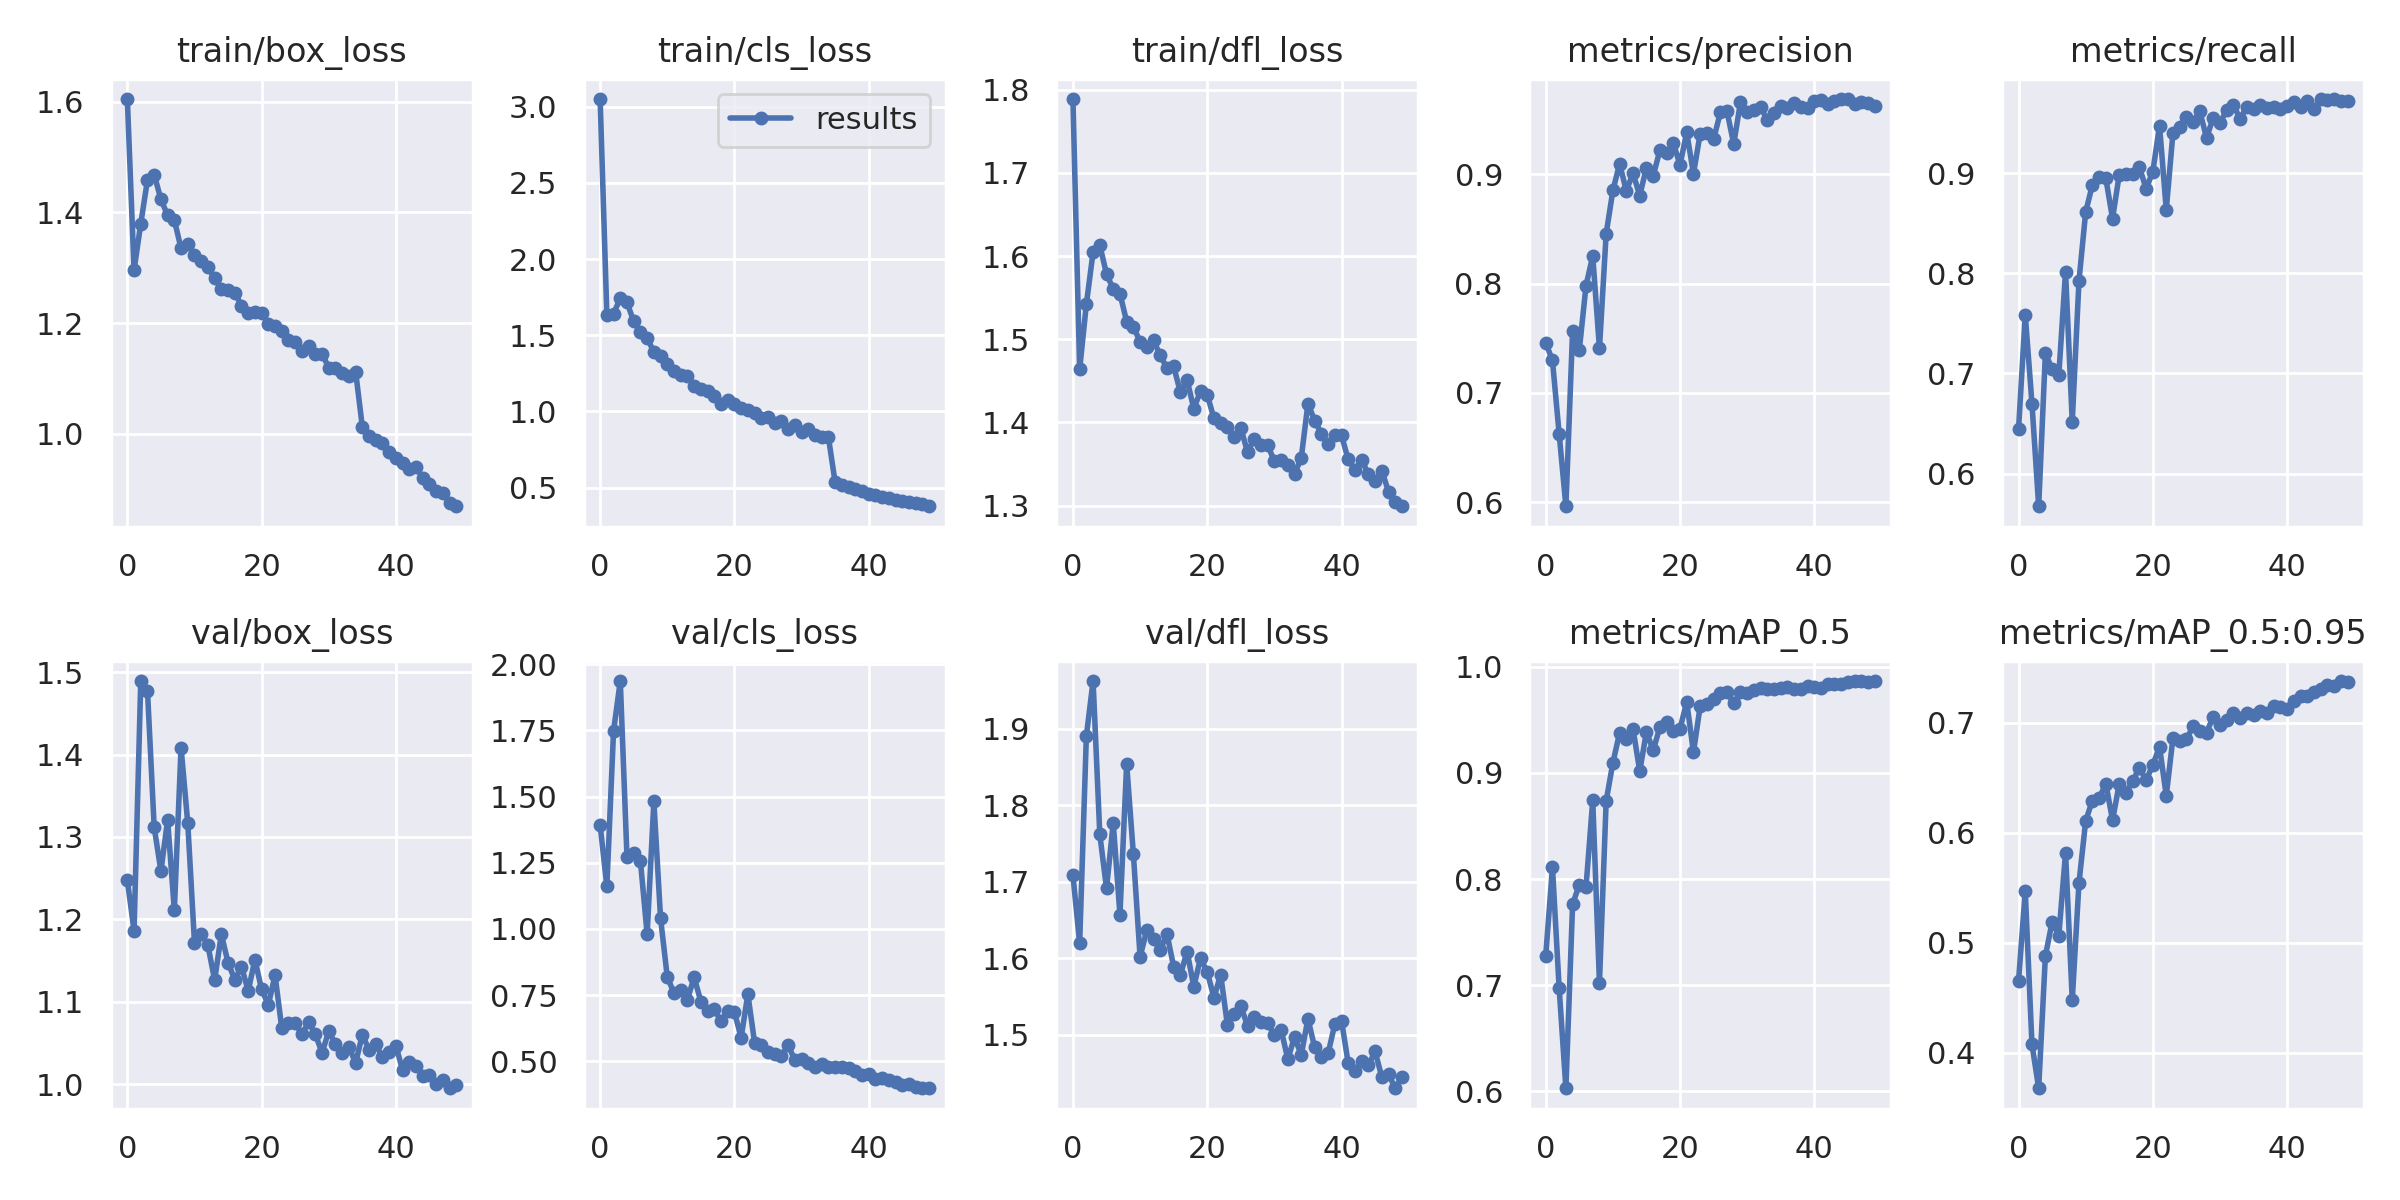

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp8/results.png", width=1000)

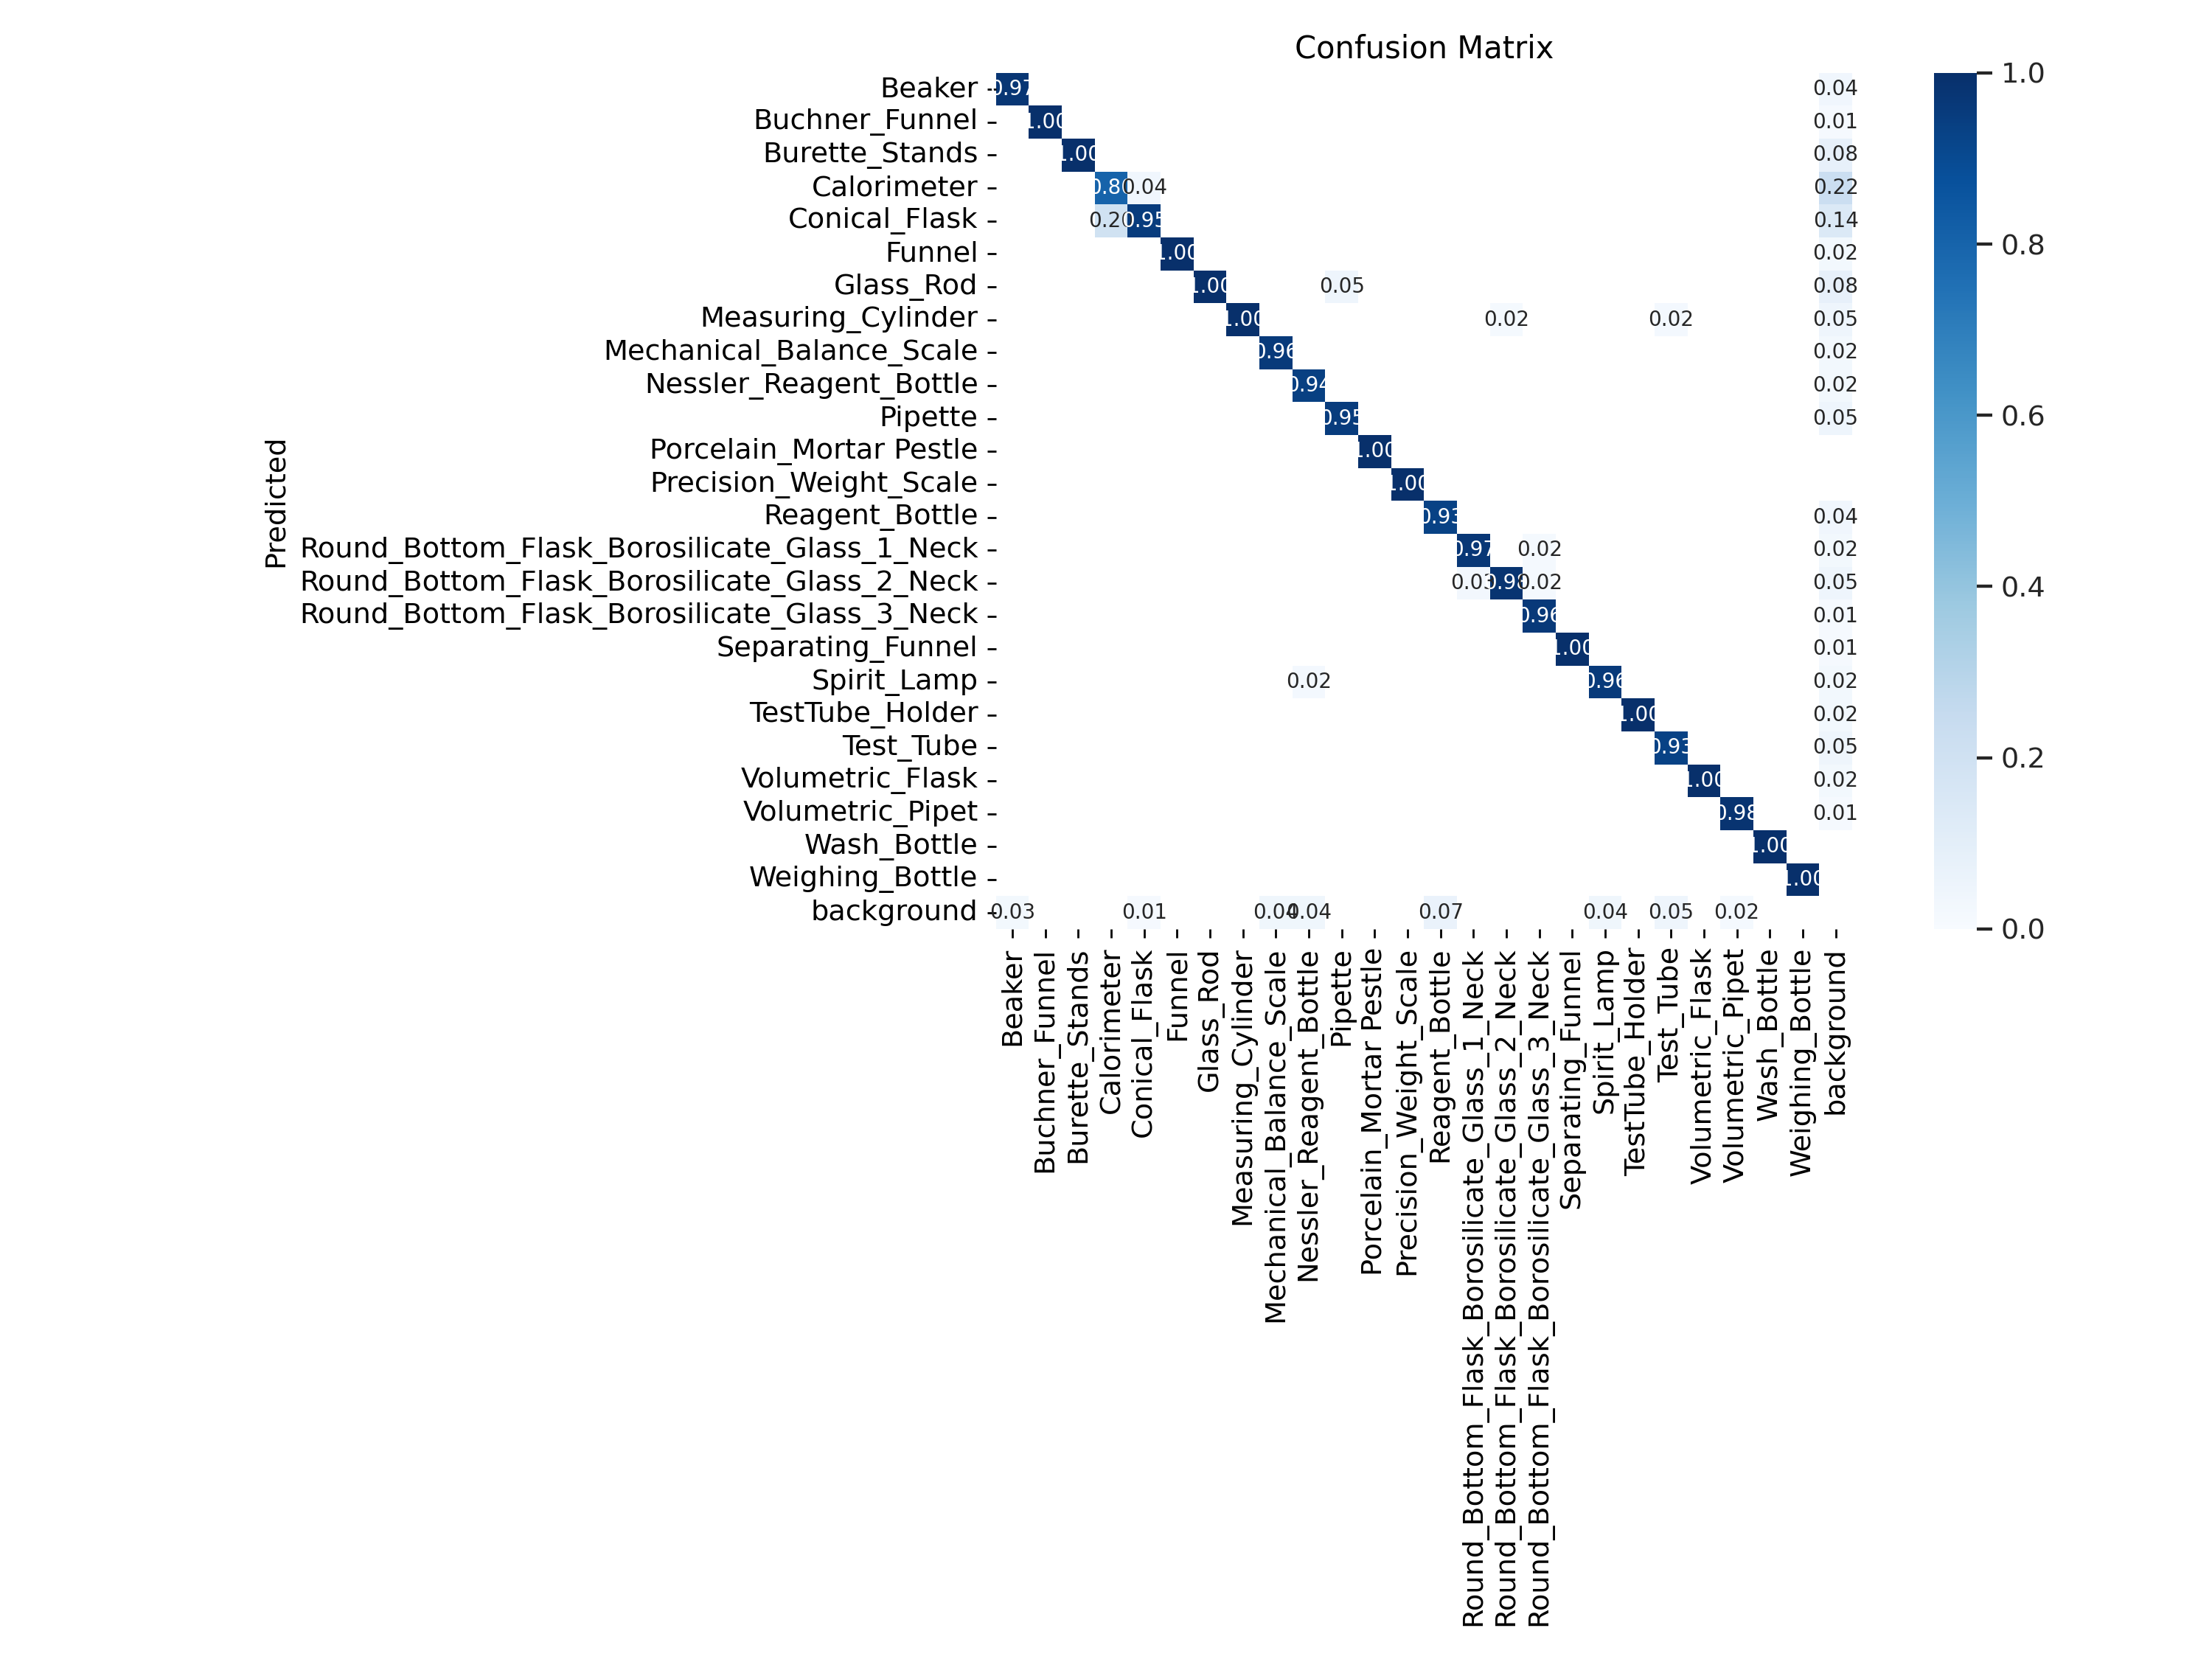

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp8/confusion_matrix.png", width=1000)

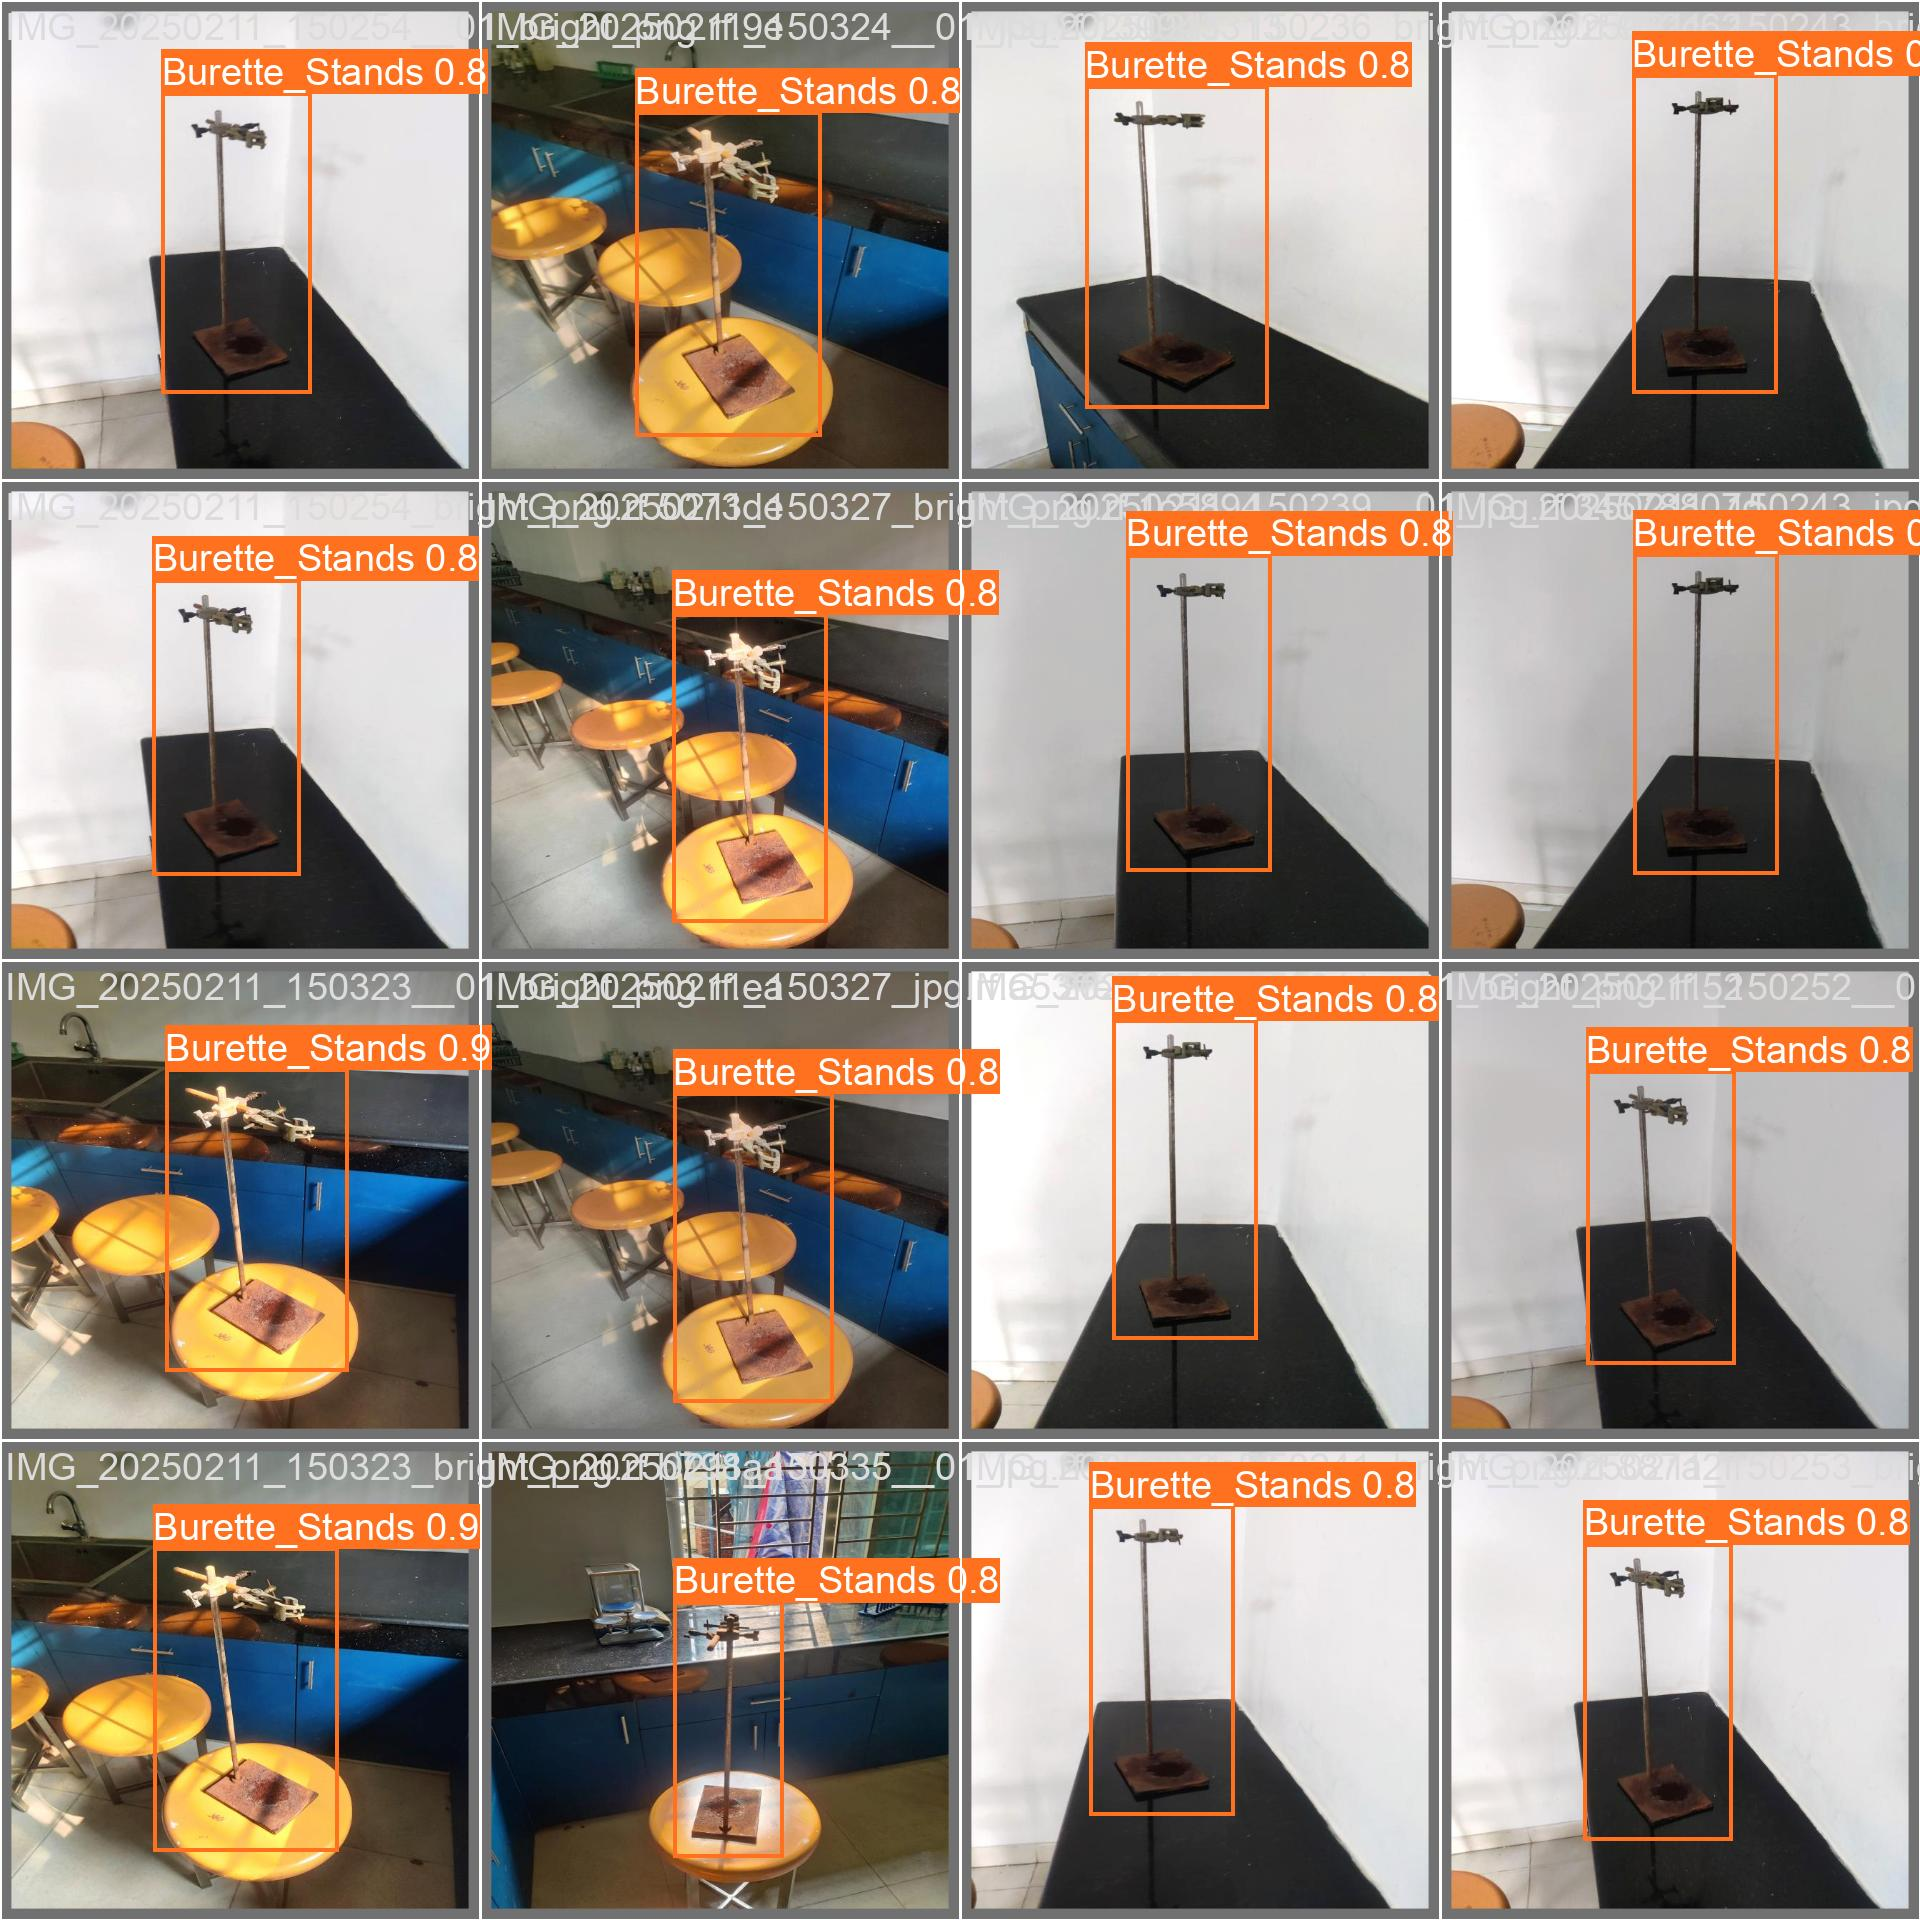

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp8/val_batch0_pred.jpg", width=1000)

***Validate Custom Model***

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp8/weights/best.pt

/content/yolov9
val: data=/content/yolov9/Chemistry-Lab-Apparatus-DETN-8/data.yaml, weights=['/content/yolov9/runs/train/exp8/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25430235 parameters, 0 gradients, 102.6 GFLOPs
val: Scanning /content/yolov9/Chemistry-Lab-Apparatus-DETN-8/valid/labels.cache... 920 images, 1 backgrounds, 0 corrupt: 100% 920/920 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 29/29 [00:35<00:00,  1.21s/it]
                   all        920       1393      0.965      0.972      0.986      0.738
                B

***Inference with Custom Model***

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp8/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/yolov9/runs/train/exp8/weights/best.pt'], source=/content/yolov9/Chemistry-Lab-Apparatus-DETN-8/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25430235 parameters, 0 gradients, 102.6 GFLOPs
image 1/459 /content/yolov9/Chemistry-Lab-Apparatus-DETN-8/test/images/20250105_150104_jpg.rf.a190255edf3a70ffa40d81fc849c79cb.jpg: 1280x1280 3 Beakers, 1 Test_Tube, 114.8ms
image 2/459 /content/yolov9/Chemistry-Lab-Apparatus-DETN-8/test/images/20250105_151558_jpg.rf.a765a02b45d2602c67ba45dc17

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.